Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [4]:
parent_dir = '../../data/fib/'

N = 25
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}1/fibonacci_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}1/fibonacci_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}1/fibonacci_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}1/fibonacci_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [5]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 11:29:51 2025 +0100) (510.95ms ela...,0.311,0.0000,0.277,0.83,0.11,7.44,62.02 C,Nominal
1,(Mon Mar 17 11:29:51 2025 +0100) (508.35ms ela...,0.486,0.0596,0.343,1.09,0.19,14.44,61.50 C,Nominal
2,(Mon Mar 17 11:29:52 2025 +0100) (506.43ms ela...,6.510,0.0893,0.685,7.37,0.92,49.37,61.50 C,Nominal
3,(Mon Mar 17 11:29:52 2025 +0100) (506.36ms ela...,7.840,0.0767,0.835,8.90,0.90,53.59,61.13 C,Nominal
4,(Mon Mar 17 11:29:53 2025 +0100) (509.12ms ela...,6.020,0.0819,0.815,7.03,1.08,56.88,61.13 C,Nominal


In [6]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(142, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 11:30:02 2025 +0100) (109.12ms ela...,18.9,0.00000,0.675,19.98,2.18,89.73,59.71 C,Nominal
1,(Mon Mar 17 11:30:02 2025 +0100) (106.06ms ela...,42.3,0.10200,1.630,43.54,3.99,99.81,59.71 C,Nominal
2,(Mon Mar 17 11:30:02 2025 +0100) (104.88ms ela...,39.0,0.00116,1.170,40.25,4.00,99.93,59.71 C,Nominal
3,(Mon Mar 17 11:30:02 2025 +0100) (105.51ms ela...,39.5,0.14500,2.150,41.45,3.96,99.50,62.44 C,Nominal
4,(Mon Mar 17 11:30:02 2025 +0100) (104.77ms ela...,39.5,0.27100,1.030,43.28,4.00,100.03,62.44 C,Nominal


In [7]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 11:27:48 2025 +0100) (510.98ms ela...,0.304,0.0000,0.275,0.83,0.10,6.66,58.67 C,Nominal
1,(Mon Mar 17 11:27:48 2025 +0100) (508.70ms ela...,2.540,0.0577,0.410,3.19,0.52,42.79,58.67 C,Nominal
2,(Mon Mar 17 11:27:49 2025 +0100) (507.59ms ela...,14.100,0.1930,1.260,15.38,1.79,79.31,58.71 C,Nominal
3,(Mon Mar 17 11:27:49 2025 +0100) (507.20ms ela...,12.600,0.0787,1.180,13.85,1.79,95.60,58.71 C,Nominal
4,(Mon Mar 17 11:27:50 2025 +0100) (508.02ms ela...,1.170,0.0672,0.635,2.18,0.69,40.06,58.61 C,Nominal


In [8]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(43, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 11:27:59 2025 +0100) (109.02ms ela...,29.2,0.1080,1.73,32.84,3.28,90.60,57.62 C,Nominal
1,(Mon Mar 17 11:27:59 2025 +0100) (105.33ms ela...,26.5,0.1990,1.23,30.34,3.08,86.11,57.62 C,Nominal
2,(Mon Mar 17 11:27:59 2025 +0100) (105.41ms ela...,35.9,0.0504,1.54,39.96,3.73,96.77,57.62 C,Nominal
3,(Mon Mar 17 11:27:59 2025 +0100) (105.53ms ela...,31.5,0.2670,1.61,35.97,3.28,95.24,57.62 C,Nominal
4,(Mon Mar 17 11:27:59 2025 +0100) (104.69ms ela...,34.9,0.2260,2.45,40.32,3.74,97.10,57.62 C,Nominal


Clean the Data

In [9]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [10]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [11]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 11:29:51,0.311,0.0000,0.277,0.83,0.11,7.44,62.02,Nominal,510.95
1,2025-03-17 11:29:51,0.486,0.0596,0.343,1.09,0.19,14.44,61.50,Nominal,508.35
2,2025-03-17 11:29:52,6.510,0.0893,0.685,7.37,0.92,49.37,61.50,Nominal,506.43
3,2025-03-17 11:29:52,7.840,0.0767,0.835,8.90,0.90,53.59,61.13,Nominal,506.36
4,2025-03-17 11:29:53,6.020,0.0819,0.815,7.03,1.08,56.88,61.13,Nominal,509.12


In [12]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(142, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 11:30:02,18.9,0.00000,0.675,19.98,2.18,89.73,59.71,Nominal,109.12
1,2025-03-17 11:30:02,42.3,0.10200,1.630,43.54,3.99,99.81,59.71,Nominal,106.06
2,2025-03-17 11:30:02,39.0,0.00116,1.170,40.25,4.00,99.93,59.71,Nominal,104.88
3,2025-03-17 11:30:02,39.5,0.14500,2.150,41.45,3.96,99.50,62.44,Nominal,105.51
4,2025-03-17 11:30:02,39.5,0.27100,1.030,43.28,4.00,100.03,62.44,Nominal,104.77


In [13]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 11:27:48,0.304,0.0000,0.275,0.83,0.10,6.66,58.67,Nominal,510.98
1,2025-03-17 11:27:48,2.540,0.0577,0.410,3.19,0.52,42.79,58.67,Nominal,508.70
2,2025-03-17 11:27:49,14.100,0.1930,1.260,15.38,1.79,79.31,58.71,Nominal,507.59
3,2025-03-17 11:27:49,12.600,0.0787,1.180,13.85,1.79,95.60,58.71,Nominal,507.20
4,2025-03-17 11:27:50,1.170,0.0672,0.635,2.18,0.69,40.06,58.61,Nominal,508.02


In [14]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(43, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 11:27:59,29.2,0.1080,1.73,32.84,3.28,90.60,57.62,Nominal,109.02
1,2025-03-17 11:27:59,26.5,0.1990,1.23,30.34,3.08,86.11,57.62,Nominal,105.33
2,2025-03-17 11:27:59,35.9,0.0504,1.54,39.96,3.73,96.77,57.62,Nominal,105.41
3,2025-03-17 11:27:59,31.5,0.2670,1.61,35.97,3.28,95.24,57.62,Nominal,105.53
4,2025-03-17 11:27:59,34.9,0.2260,2.45,40.32,3.74,97.10,57.62,Nominal,104.69


Visualize the Data

In [15]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


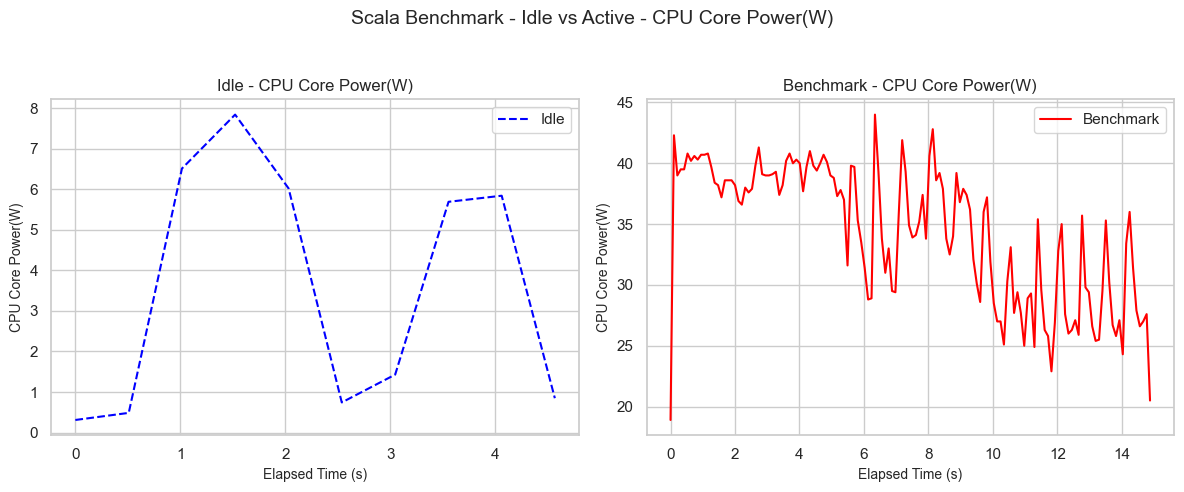

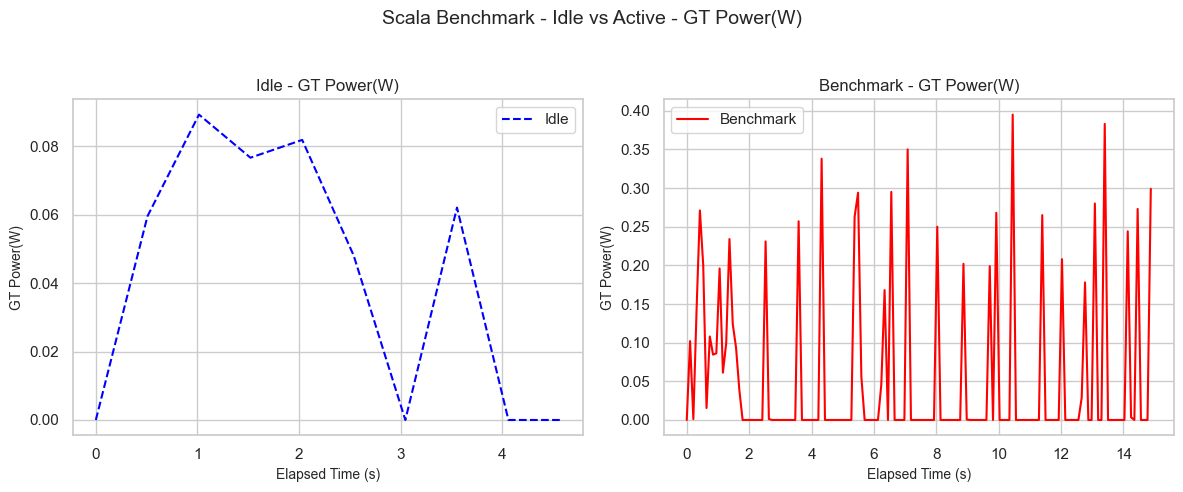

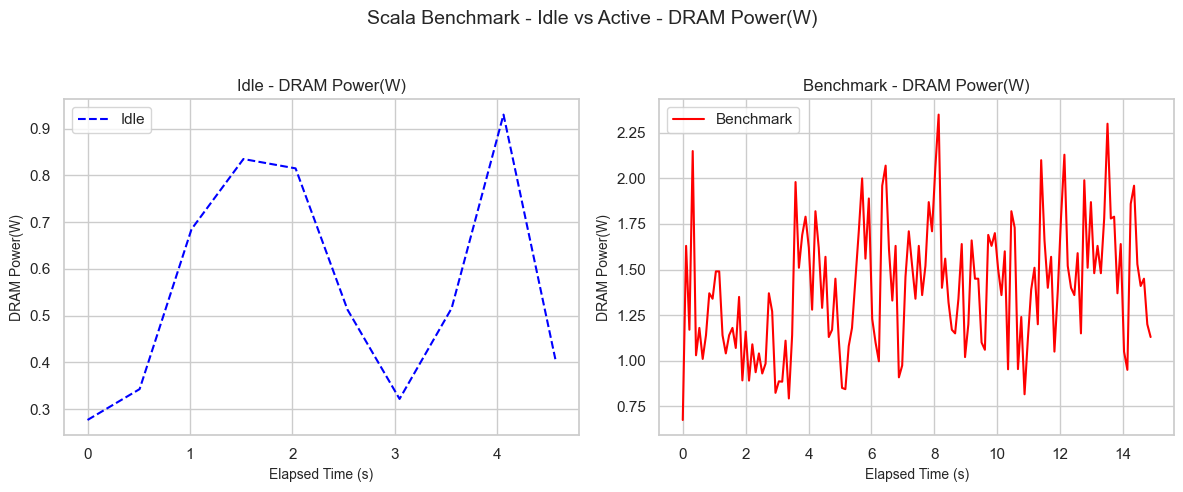

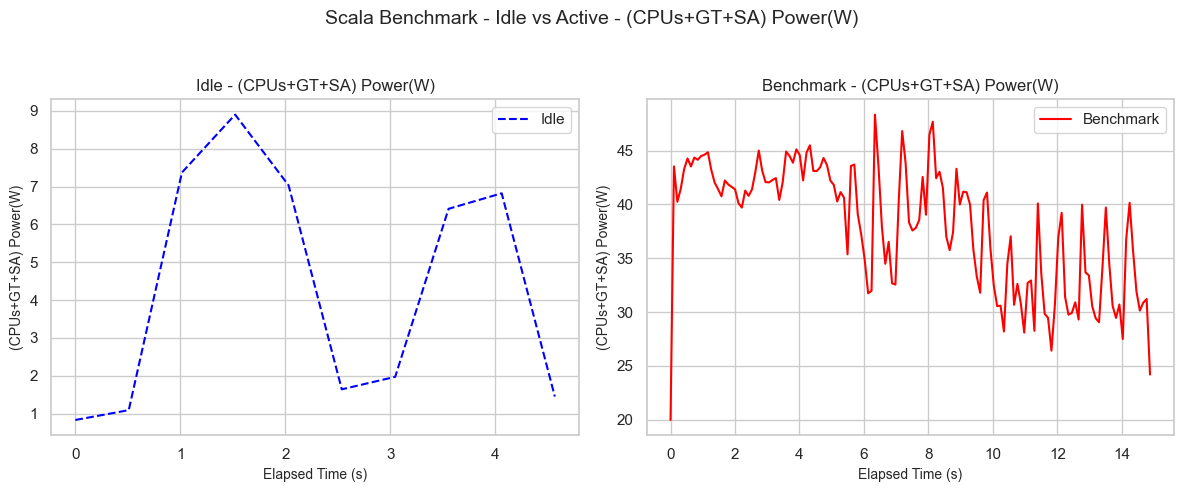

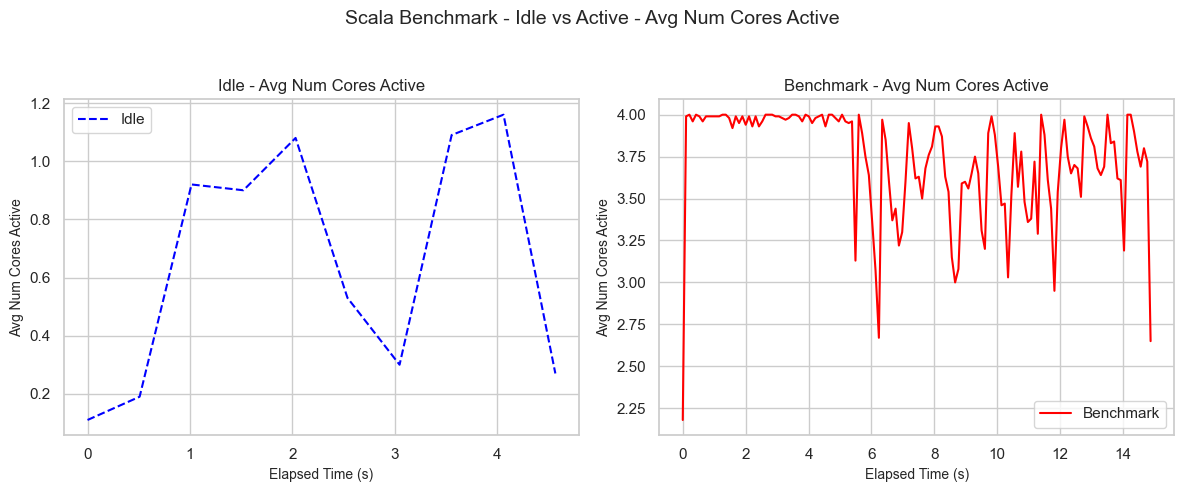

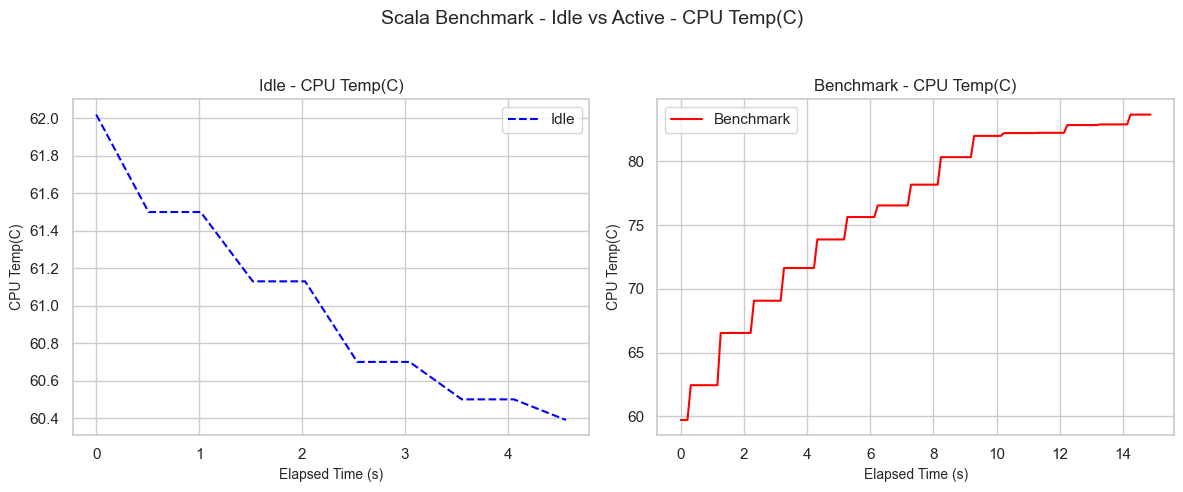

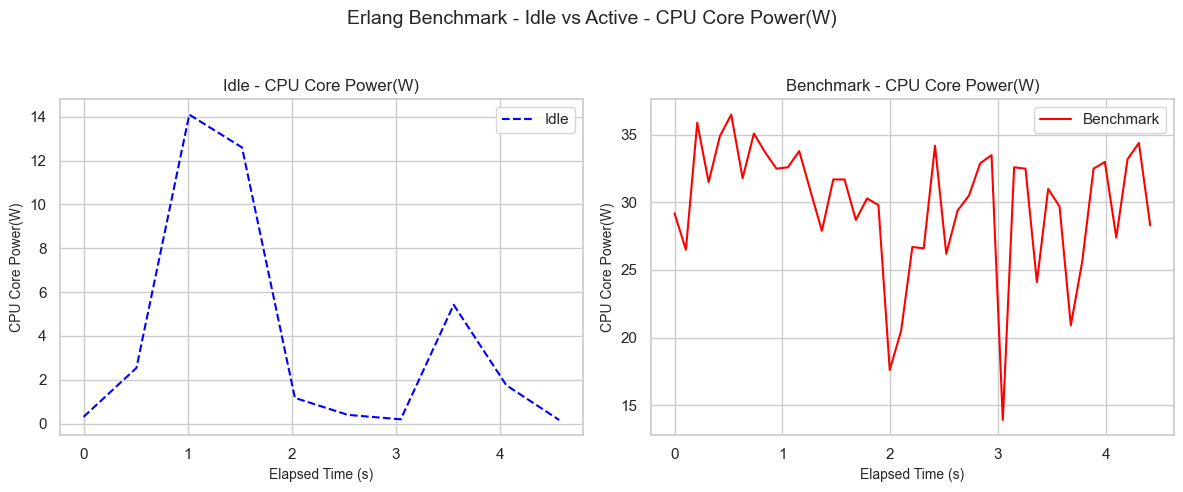

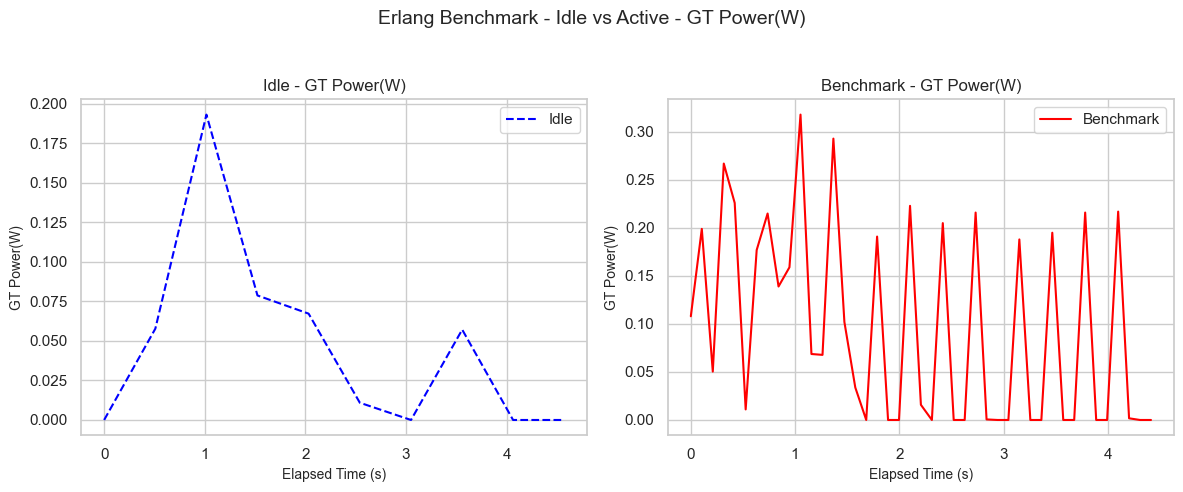

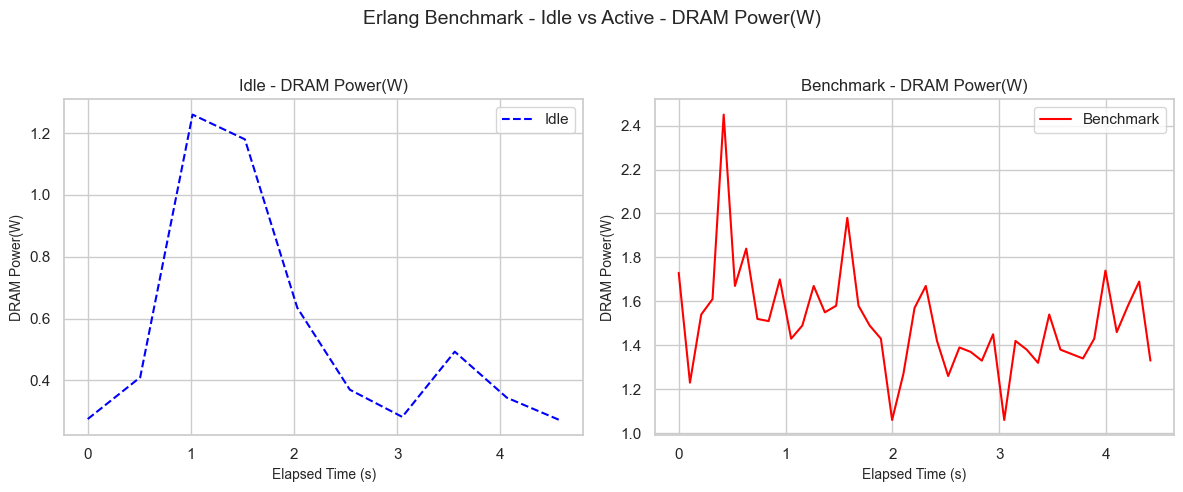

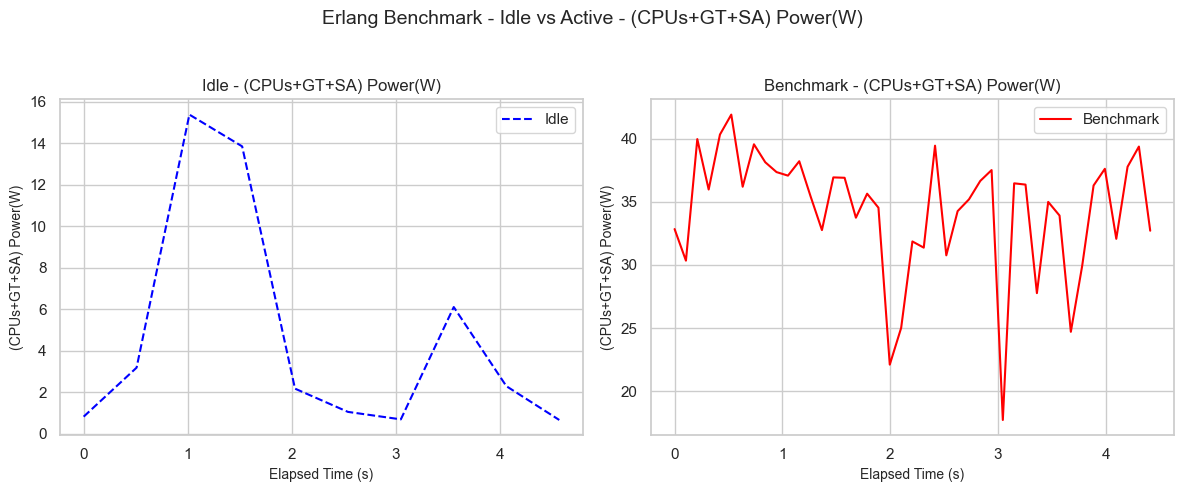

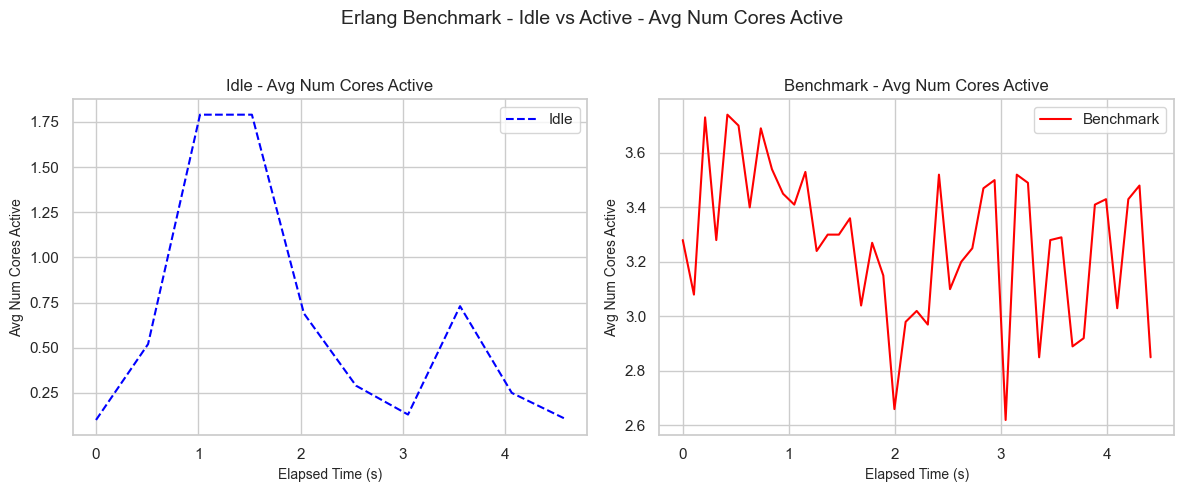

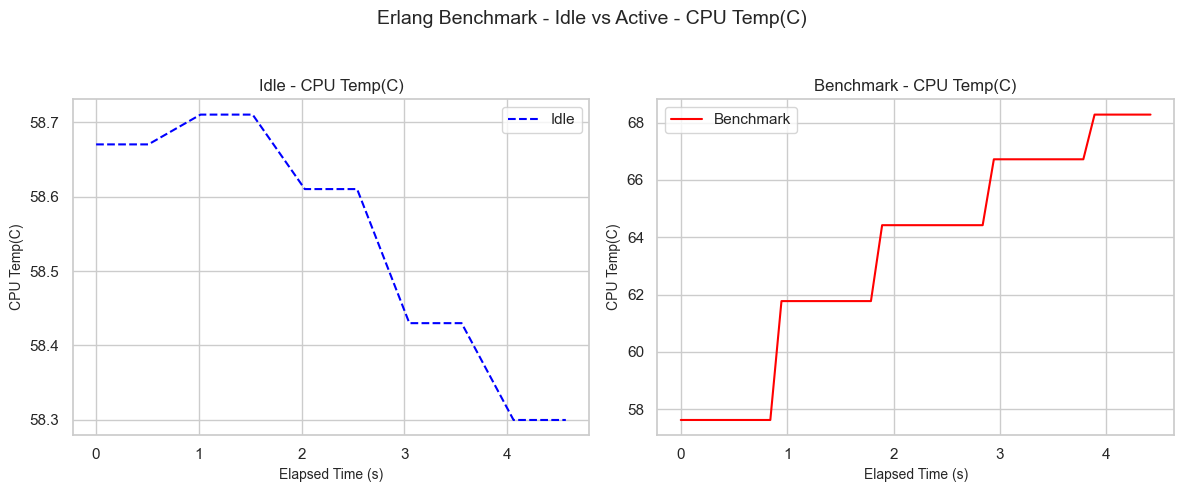

In [16]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [17]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [18]:
def format_message_count(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

message_label = format_message_count(N)
title_config_prefix = f"({message_label} Index, {ITERATIONS} Iterations)"

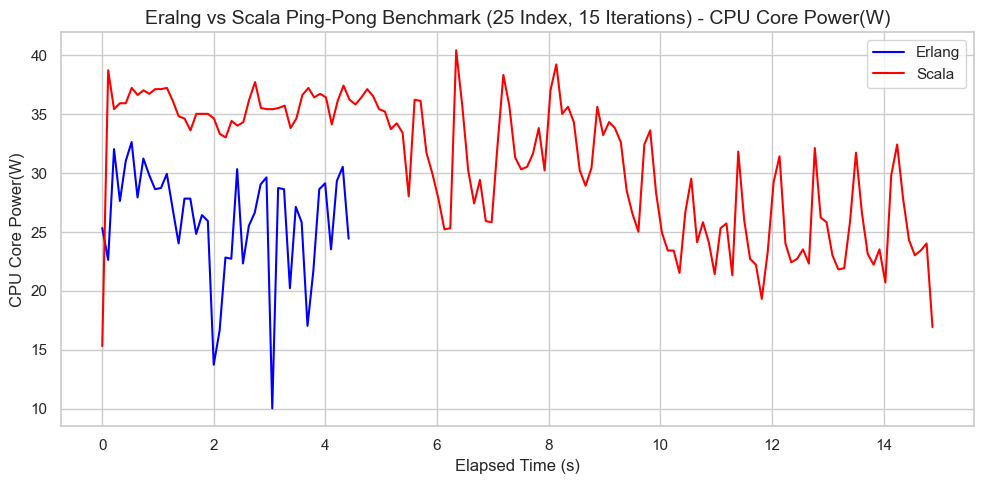

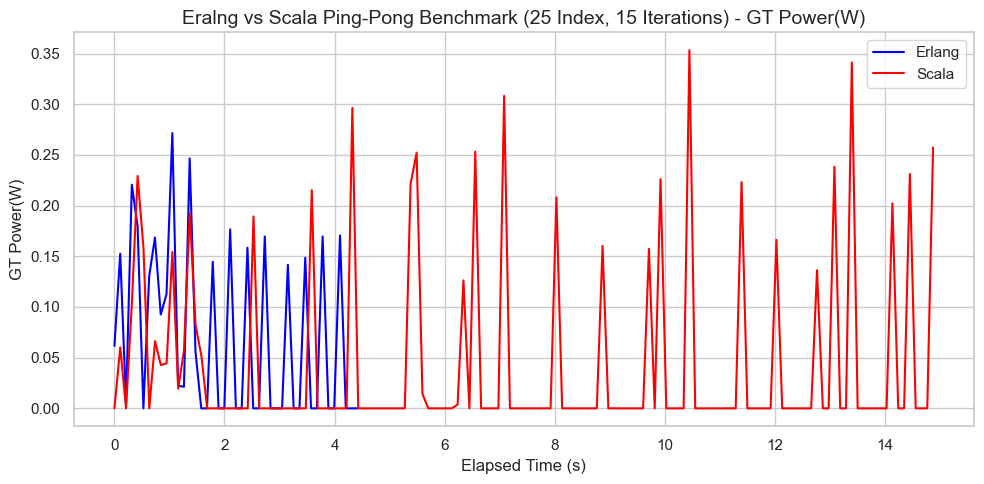

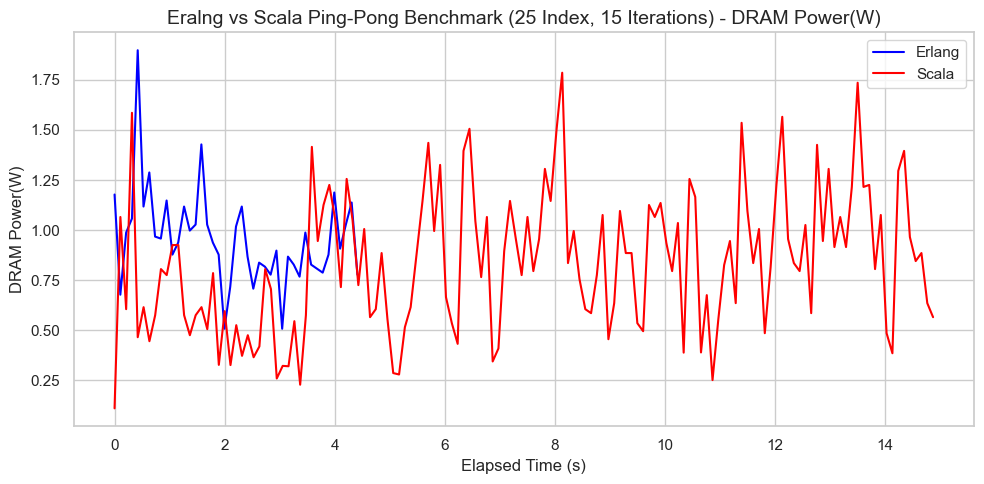

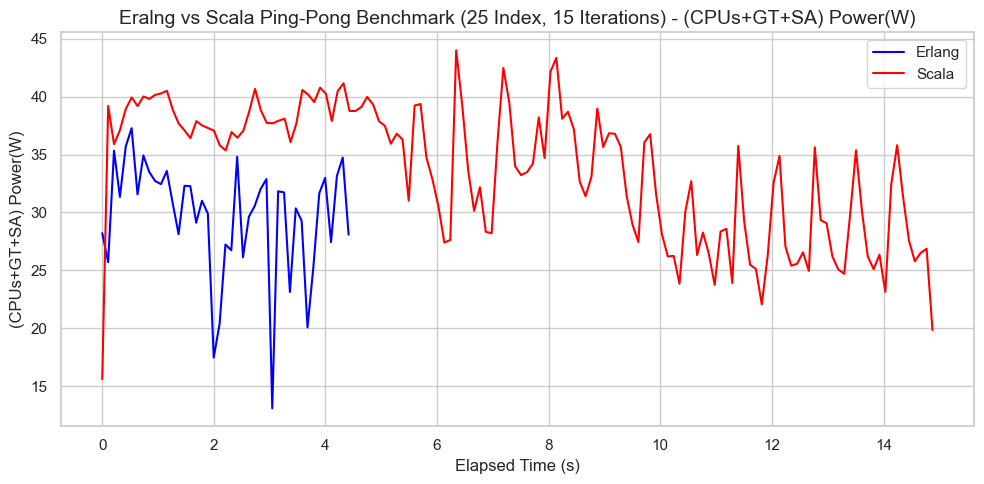

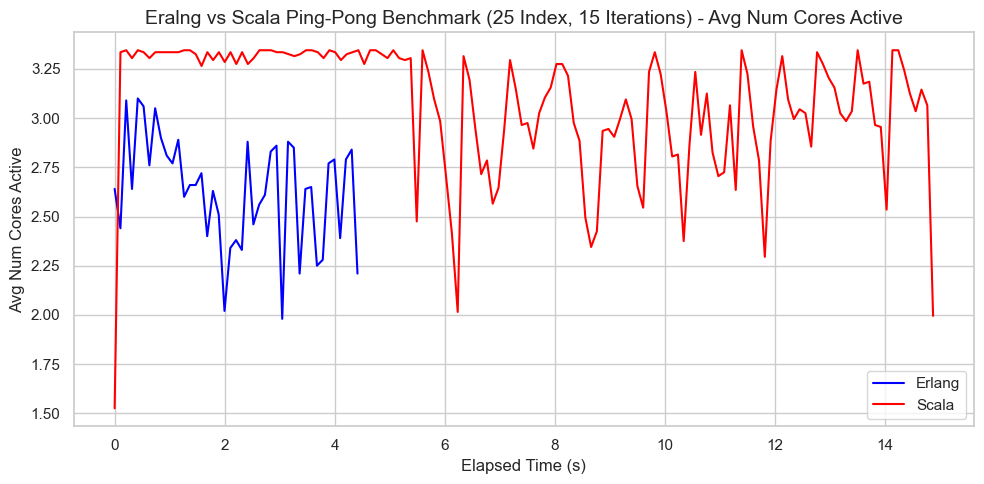

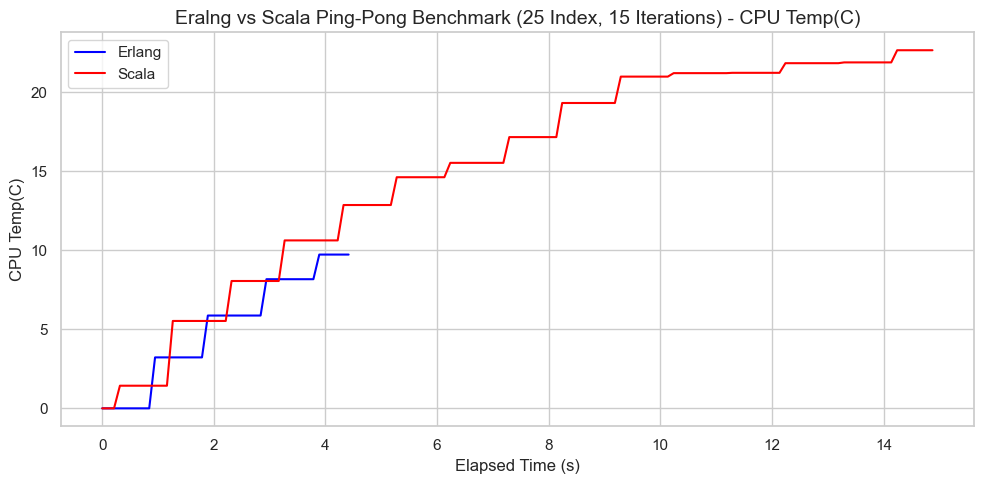

In [19]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [20]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [21]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.731017
GT Power(W)               0.012002
DRAM Power(W)             0.835249
(CPUs+GT+SA) Power(W)    33.630197
CPU Temp(C)              15.217718
Avg Num Cores Active      3.079296
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        25.952979
GT Power(W)               0.048978
DRAM Power(W)             0.955342
(CPUs+GT+SA) Power(W)    29.688814
CPU Temp(C)               4.918093
Avg Num Cores Active      2.630930
dtype: float64


Compute Total Energy Consumption

In [22]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "N": N,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


File created and results saved to ../../data/fib/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 504.0023131042254 Joules
Erlang Benchmark: 134.30269390511629 Joules
